## Problem Statement

X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

## Goals and Objectives


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.




## 1.Reading the dataset

In [544]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import precision_score,recall_score,precision_recall_curve

In [545]:
# This code allows us to view the dataset upto 500 columns and 10000 rows

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',10000)

In [546]:
# Read the dataset
df = pd.read_csv('Leads.csv')

In [547]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [548]:
#Checking the Shape of dataset
df.shape

(9240, 37)

## 2.Inspecting the dataset

In [549]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [550]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [551]:
# Viewing the shape of dataset before removing duplicates

df.shape

(9240, 37)

In [552]:
# Dropping duplicate features if any

df.drop_duplicates(inplace=True)

In [553]:
# Viewing the shape of dataset after removing duplicates

df.shape

(9240, 37)

In [554]:
# Checking the percentage of missing values in the dataset column-wise
(df.isna().mean())*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## 3.Data cleaning

In [555]:
# Finding the columns which have 'Yes' or 'No' values in them and assigning them to list dual
dual = []
for i in df.columns:
    if ('No' or 'Yes') in df[i].value_counts():
        dual.append(i)

In [556]:
# Viewing the set of columns in dual variable
dual

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [557]:
# Replacing the values of 'Yes' with 1 and 'No' with 0
df[dual] = df[dual].apply(lambda x:x.map({'Yes':1,'No':0}))

In [558]:
# Viewing 1st 5 records of the dataset after replacing 'Yes' and 'No' with 1 and 0

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [559]:
# Finding the columns which have 'Select' as a value in them and storing the name of those columns in select variable

select = []

for i in df.columns:
    if 'Select' in df[i].value_counts():
        select.append(i)

In [560]:
# Viewing the select variable having columns with 'Select' value in them

select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [561]:
'''
Replacing the 'Select' value with null(NaN) values as this value probably appears when the user 
left the cell blank and it's default value(Select) was noted
''' 

for i in select:
    df[i].replace('Select',np.nan,inplace=True)

### 3.1 Handling missing values

In [562]:
# Identifying the column with more than 40% of null values

drop_cols = []

for i in df.columns:
    if df[i].isna().mean()*100 >40:
        drop_cols.append(i)



In [563]:
# Viewing the drop_cols variable which has all the column names with more than 40% of null values

drop_cols

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [564]:
# Viewing the unique values of Lead Quality column

df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

Even though 'Lead Quality' variable has more than 40% missing values, this variable seems quite important as it states the relevance of the lead.

So instead of dropping this column we can categorize the missing values as a separate category 'Unknown'

In [565]:
# Removing Lead Quality column from drop_cols variable

drop_cols.remove('Lead Quality')

In [566]:
# Viewing the drop_cols variable

drop_cols

['How did you hear about X Education',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [567]:
# Dropping the columns stored in drop_cols variable from the dataset

df.drop(drop_cols,axis=1,inplace=True)

In [568]:
# Replacing the NaN(missing value) of Lead Quality column with 'Unknown'

df['Lead Quality'].fillna('Unknown',inplace=True)

In [569]:
# Rechecking the percentage of missing values in Lead Quality column

df['Lead Quality'].isna().mean()

0.0

In [570]:
# Viewing 1st 5 records of the dataset after dropping columns with more than 40% null values

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Unknown,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [571]:
# Segregating the columns into numerical and categorical columns and assigning to num and cat variables respectively

num = []
cat = []

for i in df.columns:
    if df[i].nunique()>30:
        num.append(i)
    else:
        cat.append(i)

In [572]:
# Even after dropping the columns with >=40% values there are following percentage of missing values in various columns

df.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [573]:
# Viewing the cat variable which has all categorical columns in it

cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [574]:
# Viewing the num variable which has all numerical columns in it

num

['Prospect ID',
 'Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Country']

In [575]:
# Considering Country column as a categorical column instead of a numerical column as it has a limited set of string values

cat.append('Country')
num.remove('Country')

In [576]:
# Checking the distribution of values in Country column

df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [577]:
# Checking the distribution of values in City column

df.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Dropping the City and Country column as there is large amount of data of one value compared to others.


In [578]:
df.drop(['City','Country'],axis=1,inplace=True)

In [579]:
# Rechecking the percentage of missing values in different columns

df.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [580]:
# Replacing the null values in following categorical columns with mode of that column

col = ['Specialization','What is your current occupation','What matters most to you in choosing a course','Tags']

for i in col:
    df[i].fillna(df[i].mode()[0],inplace=True)


For the columns where the percentage of missing value is minimal, we can drop the rows as that wouldn't have much impact on the analysis

In [581]:
# Dropping the rows having missing values less than 2%

df = df[~(df['Lead Source'].isna()==True)]
df = df[~(df['TotalVisits'].isna()==True)]
df = df[~(df['Page Views Per Visit'].isna()==True)]
df = df[~(df['Last Activity'].isna()==True)]

In [582]:
# Checking the shape of the dataset after handling missing values

df.shape

(9074, 29)

In [583]:
# Confirming that all the missing values have been handled

df.isna().mean()*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

We see that all the missing values have been handled

### 3.2 Dropping the excessive columns which don't add value

In [584]:
# Segregating the columns into numerical and categorical columns
num = []
cat = []

for i in df.columns:
    if df[i].nunique()>30:
        num.append(i)
    else:
        cat.append(i)

In [585]:
# Checking data imbalance in different columns by checking the frequency of unique values in each categorical column

for i in cat:
    print(df[i].value_counts())
    print('**************')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
**************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
**************
Do Not Email
0    8358
1     716
Name: count, dtype: int64
**************
Do Not Call
0    9072
1       2
Name: count, dtype: int64
**************
Converted
0    5639
1    3435
Name: count, dtype: int64
**************
La

We can see from the above data that a lot of columns like 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque are having a majority','What matters most to you in choosing a course' have one value more compared to other leading to a data imbalance.

This sort of data imbalance in these columns will not help in the analysis.

So it's better to drop these columns

In [586]:
drop_cols = [ 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']

df.drop(drop_cols,axis=1,inplace=True)

In [587]:
# Checking the shape of dataset after dropping the above columns

df.shape

(9074, 16)

In [588]:
# Viewing first 5 records of the dataset after dropping the above columns

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Unknown,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,0,Modified


Columns Prospect ID , Lead Number don't add any value to the analysis. So we can drop them

In [589]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace = True)

In [590]:
# Viewing first 5 records of the dataset after dropping  Prospect ID , Lead Number columns

df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,0,Modified


In [591]:
# Segregating the remaining columns into numerical and categorical columns
num = []
cat = []

for i in df.columns:
    if df[i].nunique()>30:
        num.append(i)
    else:
        cat.append(i)
        

In [592]:
# Viewing the categorical columns stored in cat variable

cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [593]:
# Viewing the numerical columns stored in num variable

num

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

## 4. Univariate Analysis

### 4.1 Categorical variables

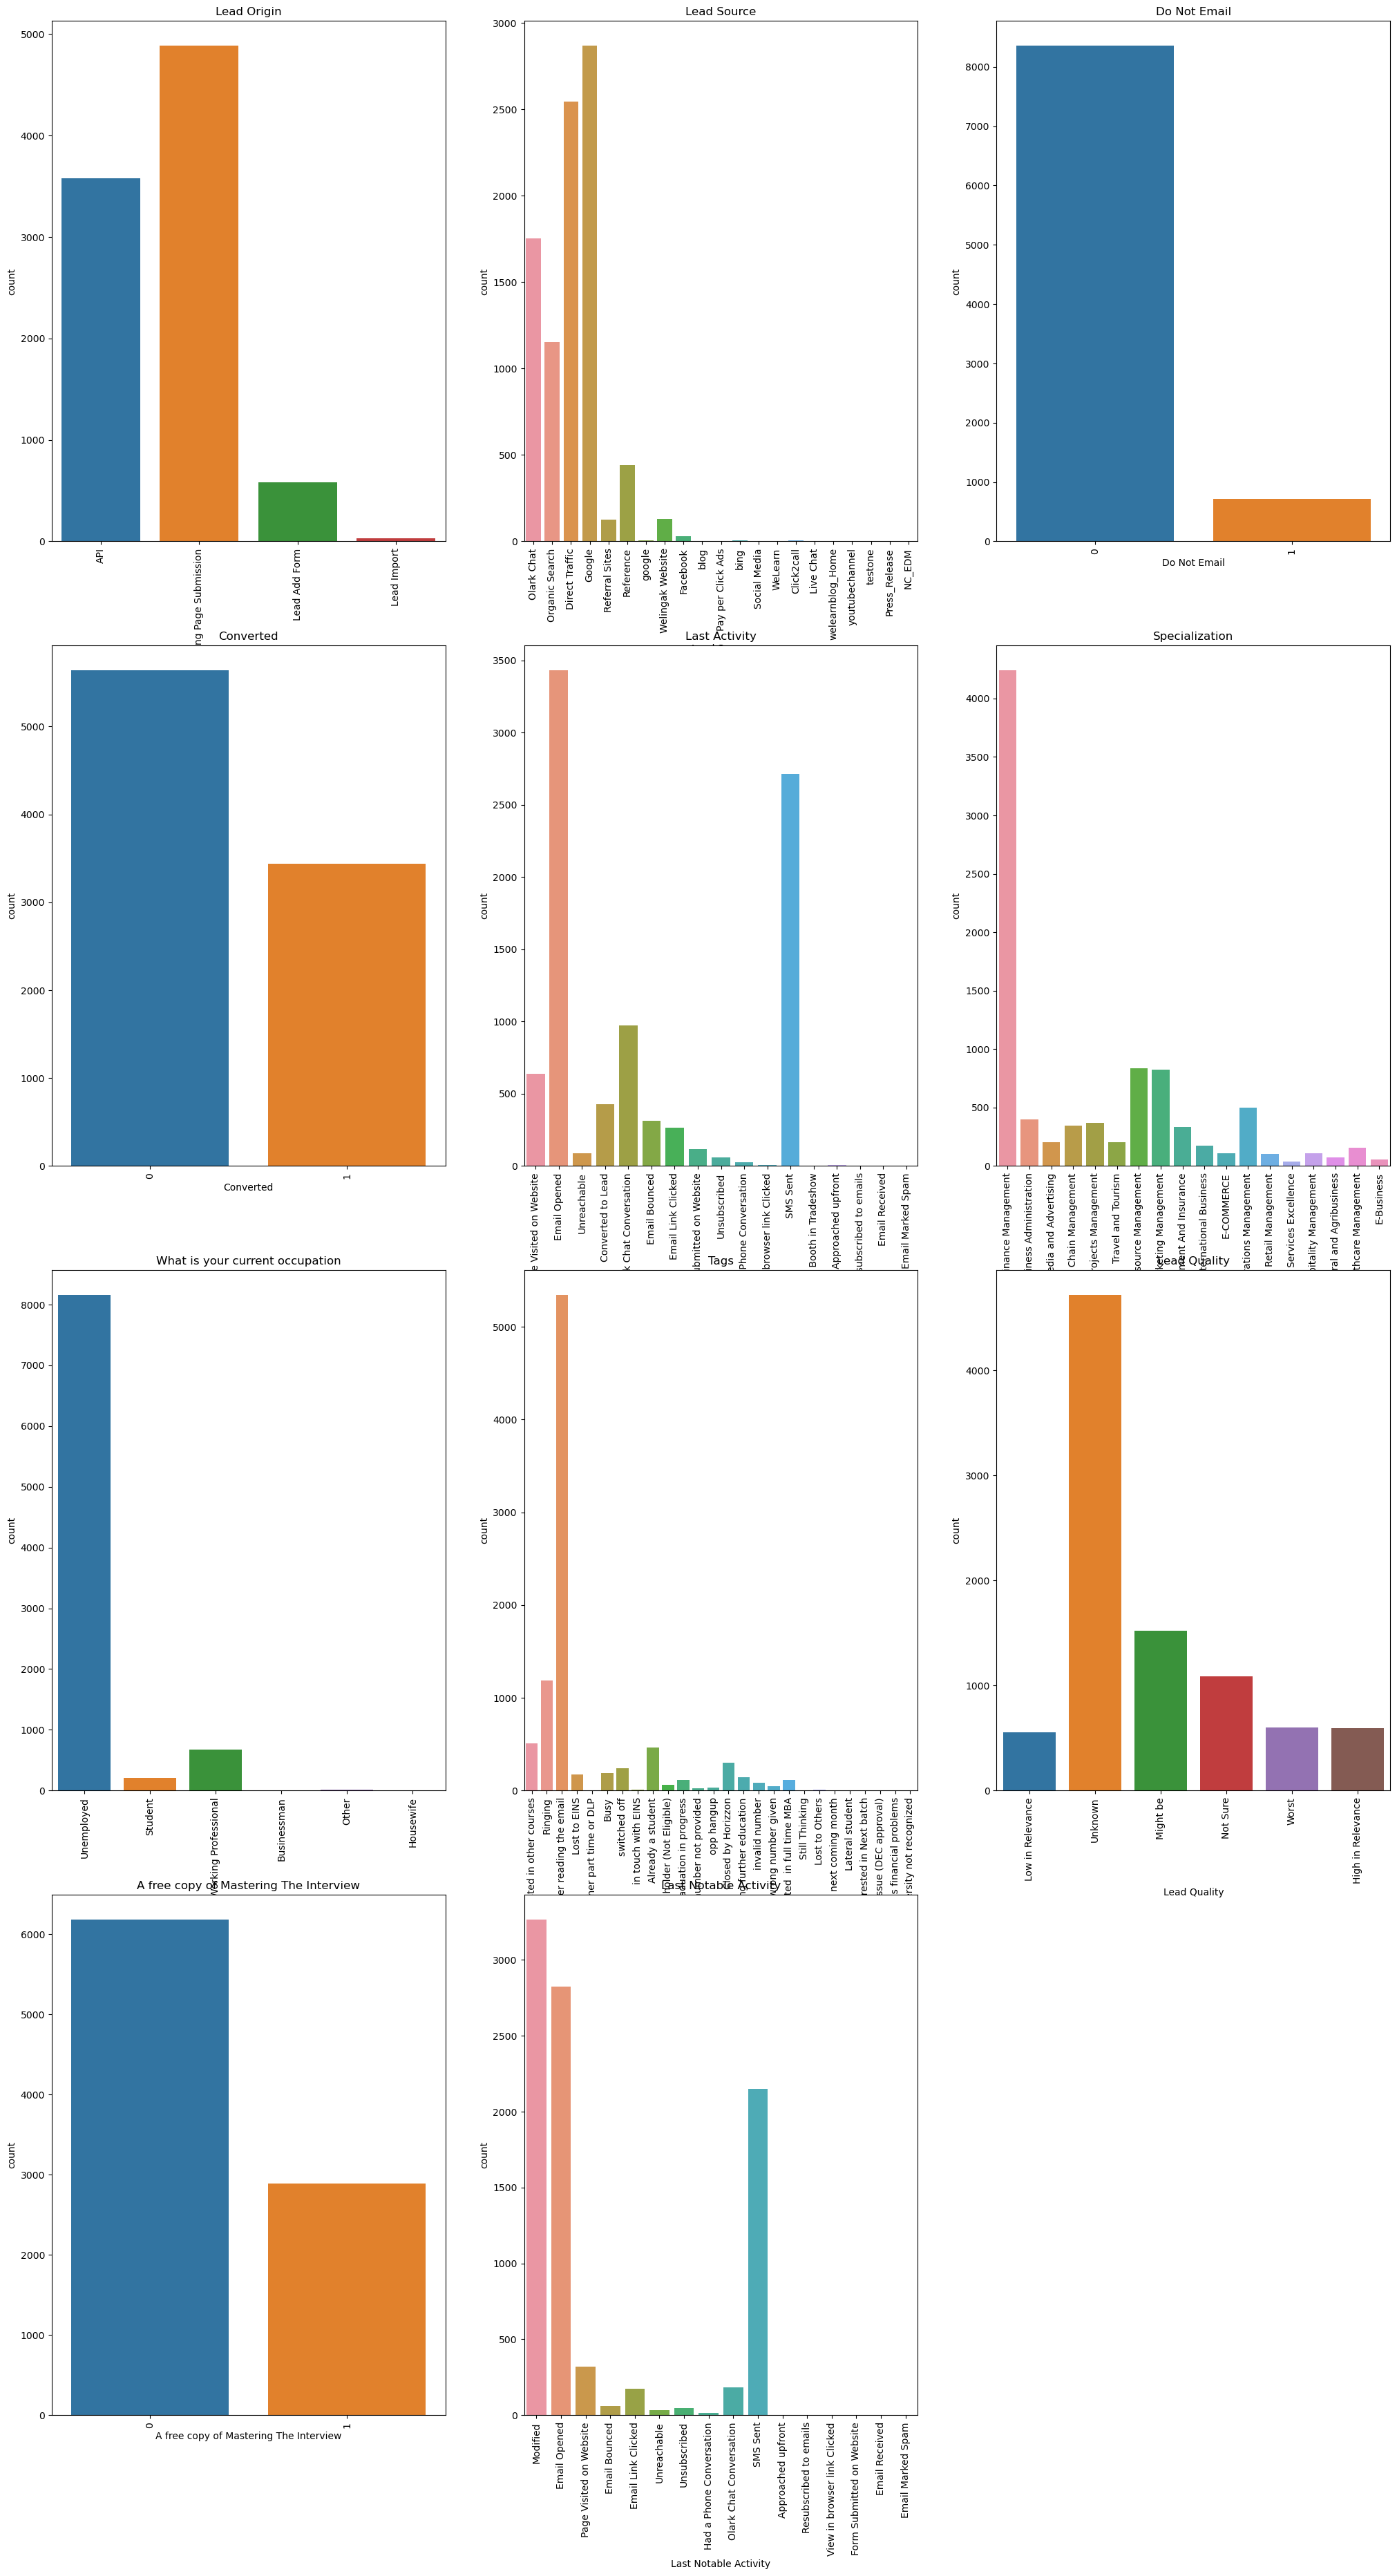

In [594]:
# Plotting countplots to see distribution of values in different categorical variables

plt.figure(figsize=[25,45])
x = 1
for i in cat:
    plt.subplot(4,3,x)
    plt.title(i)
    sns.countplot(x = df[i])
    plt.xticks(rotation = 90)
    x+=1
plt.show()

1.Most of the lead source was found to be Google and naturally have originated from Landing page submission.

2.Most of the leads want to get email from the education institution.

3.Number of leads converting to customers are significantly lesser compared to the ones rejecting the course.

4.A large number of clients have tagged that they will revert back after reading the mail.

5.Most of the leads belong to Finance management specialization and rest were specialized in the field of Resource management and Marketing management.

6.Most of the enquiries are being done by unemployed people.

7.Surprisingly large number of clients don't even want the free copy of Mastering the interview.

8.Most of the lead quality is unknown which isn't desirable.


### 4.2 Numerical variables

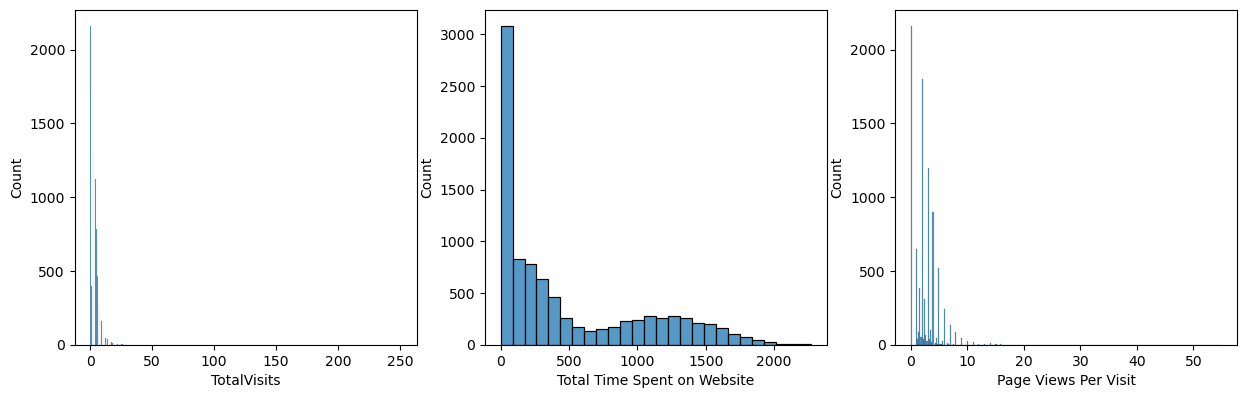

In [595]:
# Plotting countplots to see distribution of values in different numerical variables

plt.figure(figsize=[15,20])
x = 1
for i in num:
    plt.subplot(4,3,x)
    sns.histplot(x = df[i])
    x+=1
plt.show()

1.We see that most of the clients would visit the website less than 20 times and had spent a very short duration on the website about 5 minutes or lesser.

2.Most of the people who visited the website had gone through less than 5 pages.

## 5. Outlier analysis

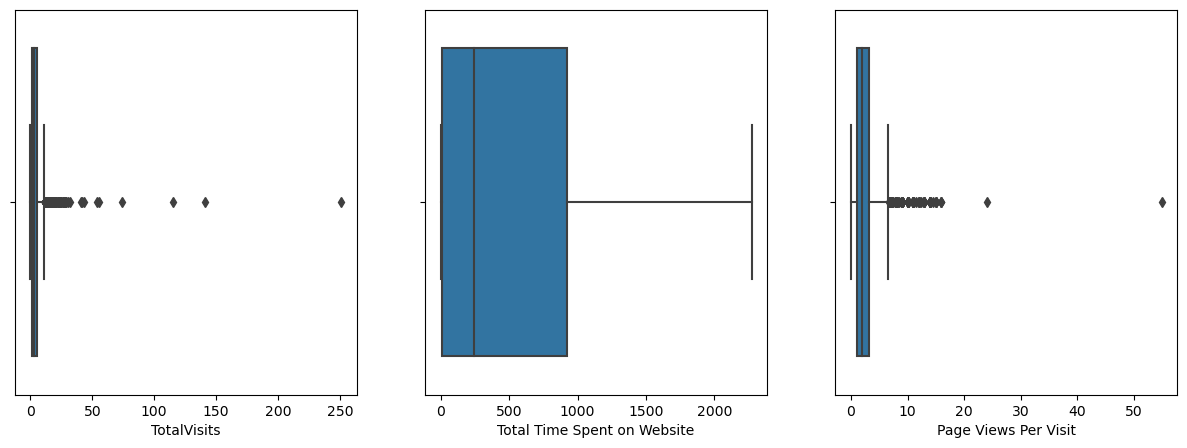

In [596]:
# Plotting boxplots of numerical columns to check for outliers

plt.figure(figsize=[15,5])
x = 1
for i in num:
    plt.subplot(1,3,x)
    sns.boxplot(x = i,data = df)
    x+=1
plt.show()


    

The variable TotalVisits and PageViewsPerVisit seems to have some outliers

In [597]:
# Checking the statistical summary of TotalVisits feature

df.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [598]:
# Checking the statistical summary of Page Views Per Visit feature

df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [599]:
# Checking the data which had more than 50 TotalVisits

df[df.TotalVisits>50]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,1,0,55.0,297,55.00,Page Visited on Website,IT Projects Management,Unemployed,Will revert after reading the email,Unknown,1,Modified
2322,Landing Page Submission,Direct Traffic,1,0,141.0,755,6.71,Page Visited on Website,Human Resource Management,Unemployed,Will revert after reading the email,Unknown,1,Page Visited on Website
5283,Landing Page Submission,Direct Traffic,1,0,74.0,1209,12.33,Page Visited on Website,Finance Management,Unemployed,Not doing further education,Not Sure,0,Page Visited on Website
5538,Landing Page Submission,Referral Sites,0,0,54.0,1280,4.50,SMS Sent,Finance Management,Unemployed,Will revert after reading the email,Unknown,0,SMS Sent
5608,Landing Page Submission,Referral Sites,1,0,115.0,187,8.21,Page Visited on Website,Rural and Agribusiness,Unemployed,Will revert after reading the email,Unknown,0,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,0,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Unemployed,Interested in other courses,Not Sure,1,Page Visited on Website


### 5.1 Outlier handling

In [600]:
# Storing the 99.5th percentile of TotalVisits in 'out_Total' variable 

out_Total = np.percentile(df['TotalVisits'],99.5)

In [601]:
# Removing the values greater than 99.5 percentile of the Total Visits column

df = df[~(df['TotalVisits']>out_Total)]

In [602]:
# Storing the 99.5th percentile of 'Page Views Per Visit' in 'out_Page' variable 

out_Page = np.percentile(df['Page Views Per Visit'],99.5)

In [603]:
# Removing the outliers for 'Page Views Per Visit' column

df = df[~(df['Page Views Per Visit']>out_Page)]

In [604]:
# Checking the shape of dataset after removing outliers

df.shape

(8989, 14)

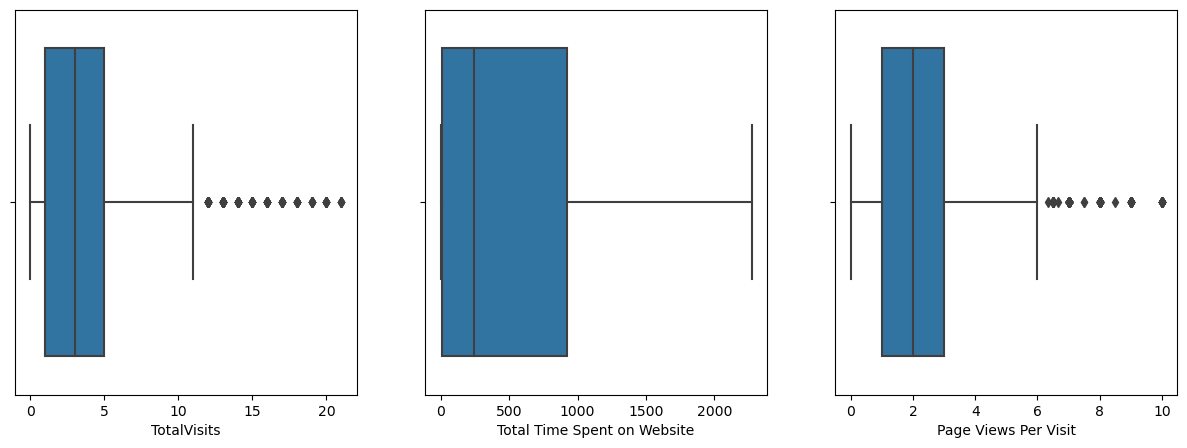

In [605]:
# Plotting boxplots of numerical columns to check for outliers

plt.figure(figsize=[15,5])
x = 1
for i in num:
    plt.subplot(1,3,x)
    sns.boxplot(x = i,data = df)
    x+=1
plt.show()


    

These boxplots look better as the datapoints are steadily increasing beyond the upper boundary

## 6. Bi-variate analysis

### 6.1 Target v/s numerical variables

The Target variable is 'Converted'

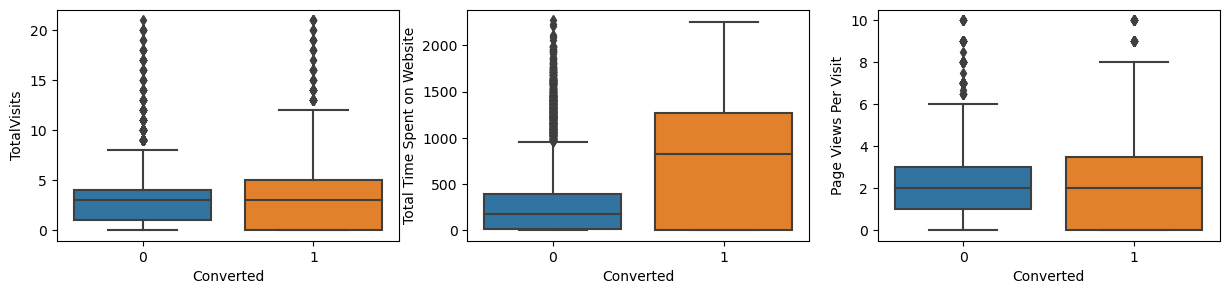

In [606]:
# Plotting boxplots of Numerical variables with the Target variable 
plt.figure(figsize=[15,3])
x = 1
for i in num:
    plt.subplot(1,3,x)
    sns.boxplot(x = 'Converted' , y =i,data = df)
    x+=1
plt.show()
    

1.We see that range of Total visits among the leads which got converted is wider compared to the non converted ones.

2.The median  of the leads who took the course with respect to Total time spent on the website is higher compared to the ones who rejected the course.

3.The median looks similar for converted and not converted leads in terms of pages viewed per visit but the range for converted leads is wider.





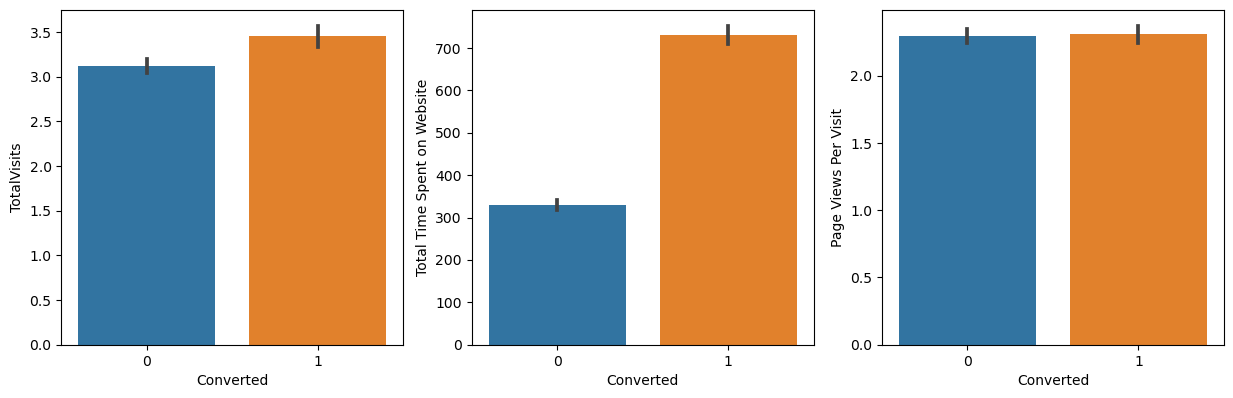

In [607]:
# Plotting scatterplots of Numerical variables with the Target variable 
plt.figure(figsize=[15,20])
x = 1
for i in num:
    plt.subplot(4,3,x)
    sns.barplot(x = 'Converted' , y = i ,data = df)
    x+=1
plt.show()
    

1.People who spent more time on the website tend to opt the course.

2.We see that number of pages viewed per visit doesn't have much influence on whether the lead gets converted or not, but if the total visits to the website are more then there are more chances of the lead getting converted as they might be visiting because they are interested in the course.



### 6.2 Target v/s categorical variables

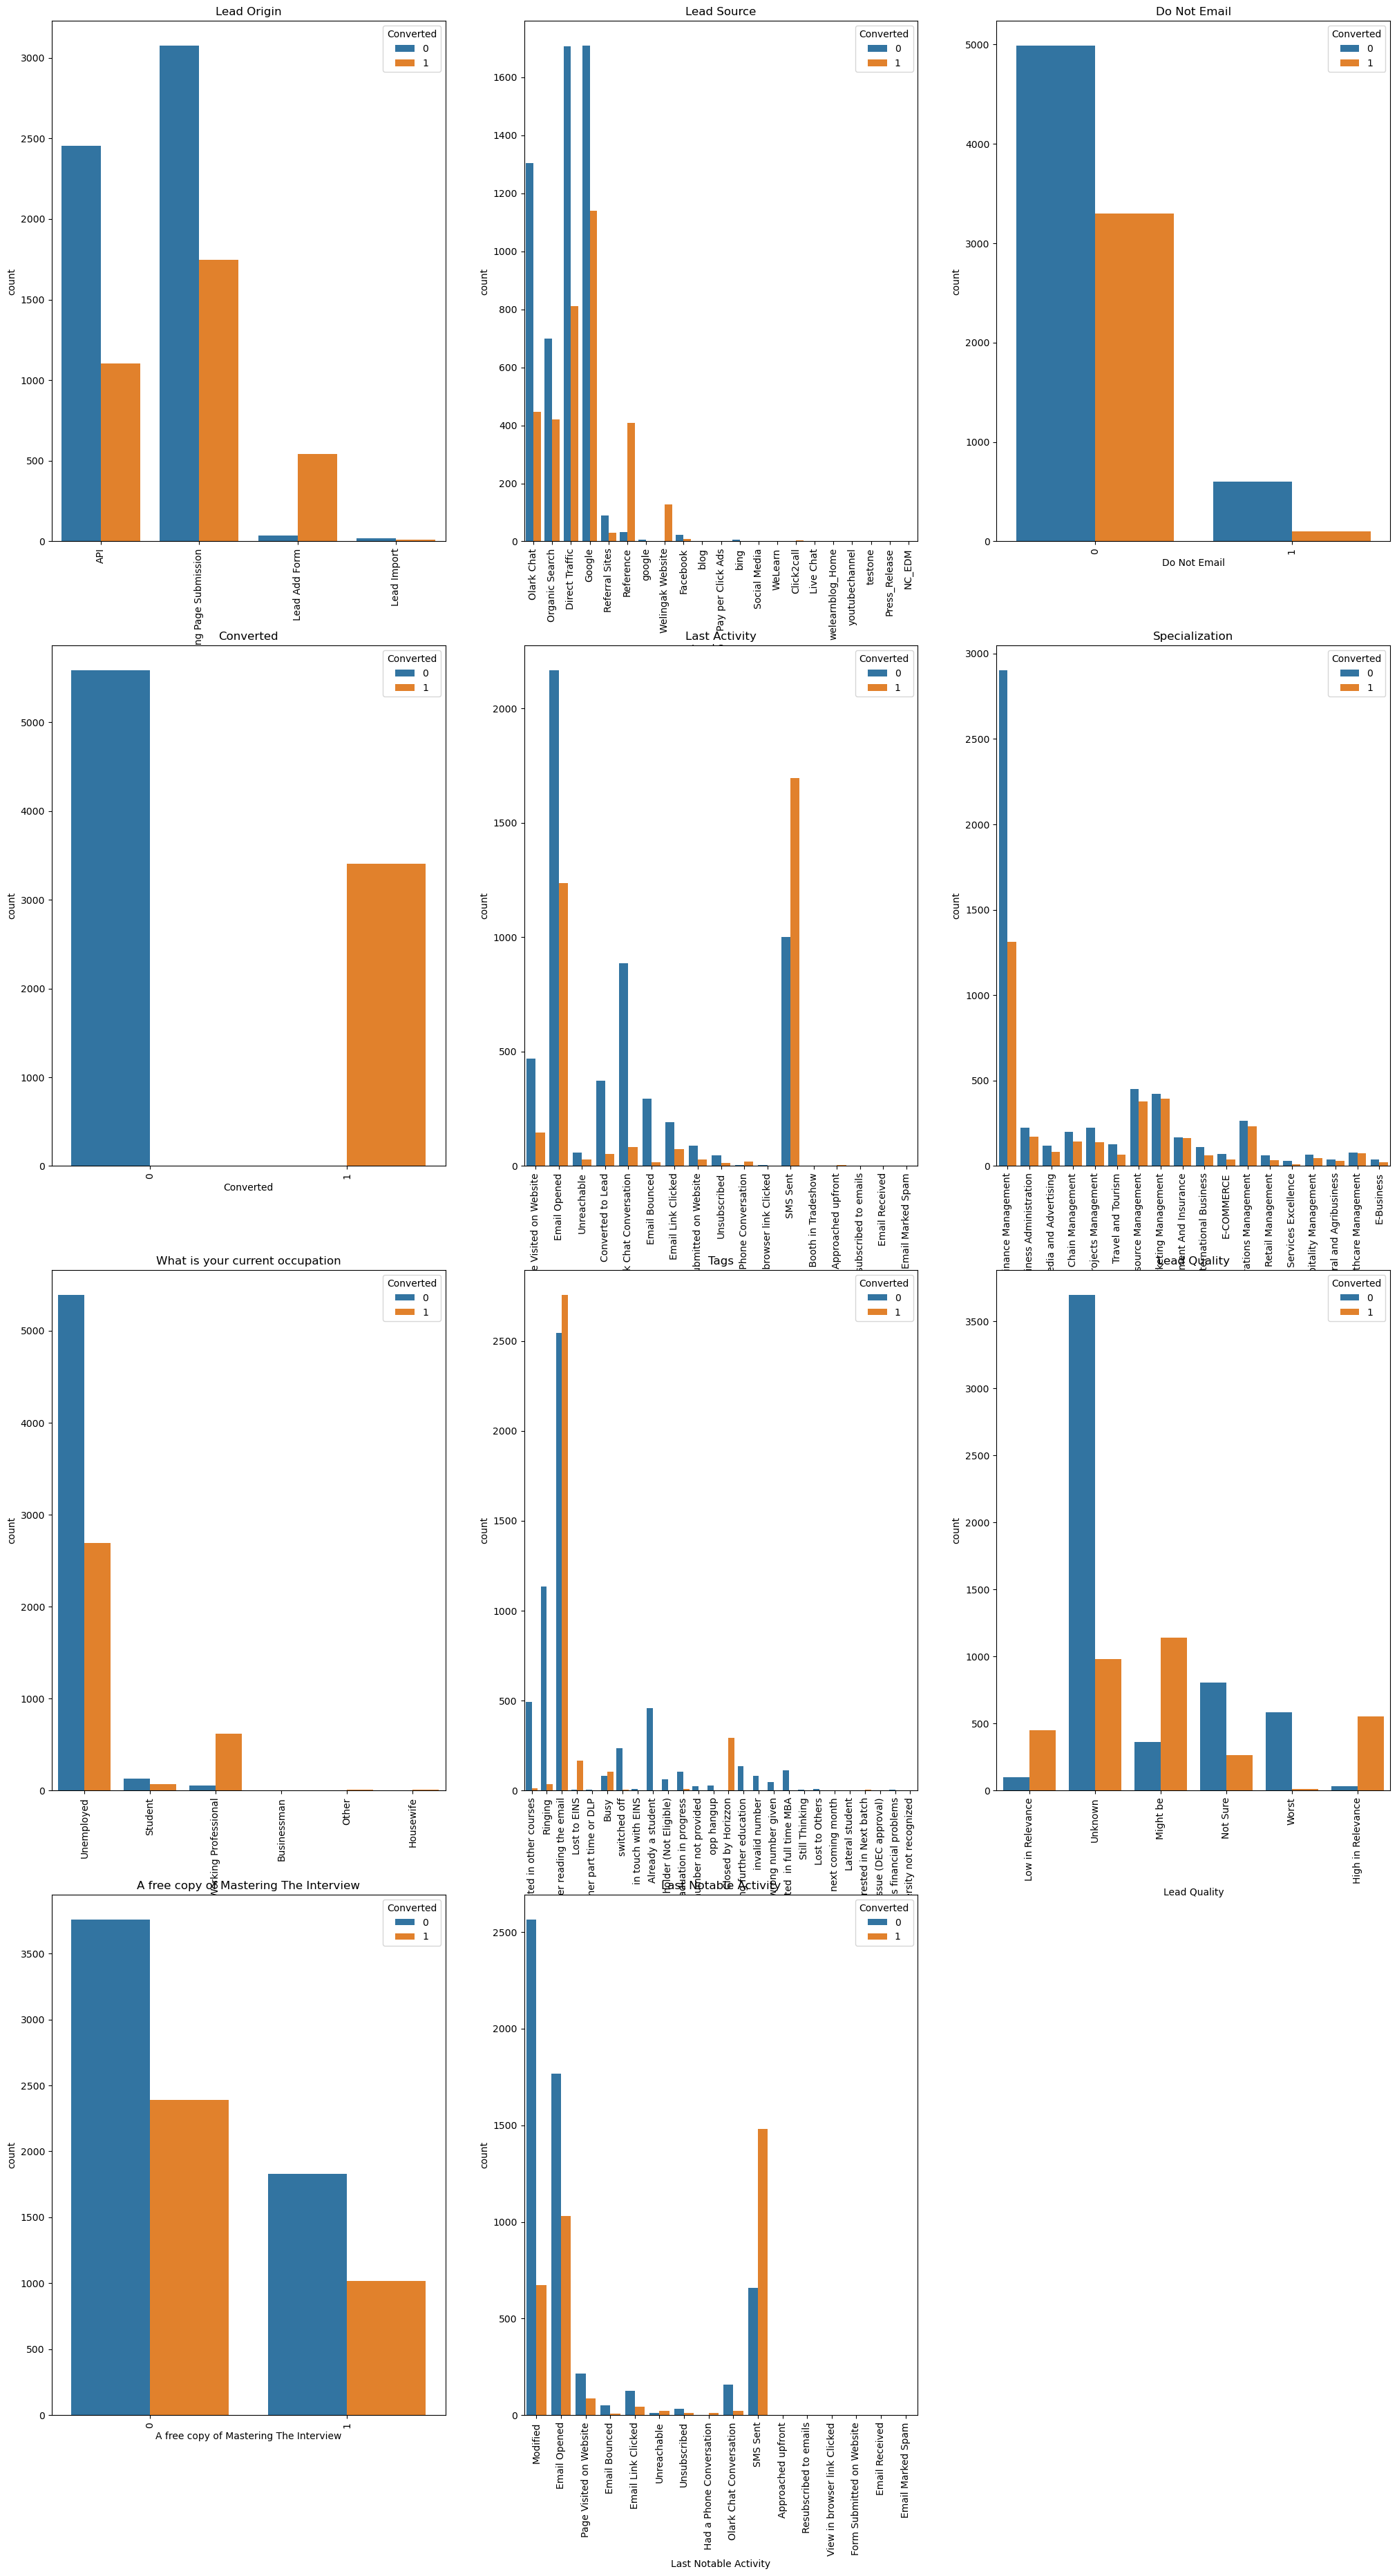

In [608]:
# Plotting boxplots of Categorical variables with the Target variable 

plt.figure(figsize=[25,45])
x = 1
for i in cat:
    plt.subplot(4,3,x)
    sns.countplot(x = i ,hue='Converted',data = df)
    plt.title(i)
    plt.xticks(rotation = 90)
    x+=1
plt.show()
    

1.Among the people who filled the lead add form, a good proportion of them have opted the course , but as a whole the people who filled the form are less compared to API's or Landing Page.

2.Emails don't seem to show any positive affect on lead conversion.

3.There are more chances of a lead opting the course when the lead had sent a SMS as last activity.

4.Most of the people enquiring about the courses were unemployed and a large majority of them didn't opt for the course.

5.We see that most of the leads whose relevance(quality) was unknown didn't opt for the course. 

## 7. Dummy variable creation

We have to treat the categorical columns and create dummy variables out of it to make the dataset completely numerical. This is necessary because we cannot build a machine learning model on columns having string values.

In [609]:
# Creating a variable dum_cols having all the columns of which dummification has to be done

dum_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','A free copy of Mastering The Interview',
 'Last Notable Activity','Lead Quality']

In [610]:
# Creating dummy variables dataset df_dum

df_dum = pd.get_dummies(df[dum_cols],dtype=int,drop_first=True)

In [611]:
# Dropping the original columns of whose dummy columns were created as they are redundant now

df.drop(dum_cols,axis=1,inplace=True)

In [612]:
# Concatenating dummy variables dataset df_dum with original dataset df

df = pd.concat([df,df_dum],axis=1)

In [613]:
# Checking the shape of dataset after dummification

df.shape

(8989, 112)

In [614]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

## 8. Train-test split

In [615]:
# Assigning the target column 'Converted' to variable y and rest of the columns to variable X

X = df.drop('Converted',axis=1)
y = df['Converted']

In [616]:
# Splitting the X and y variables into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)

In [617]:
# Checking shape of X_train

X_train.shape

(6292, 111)

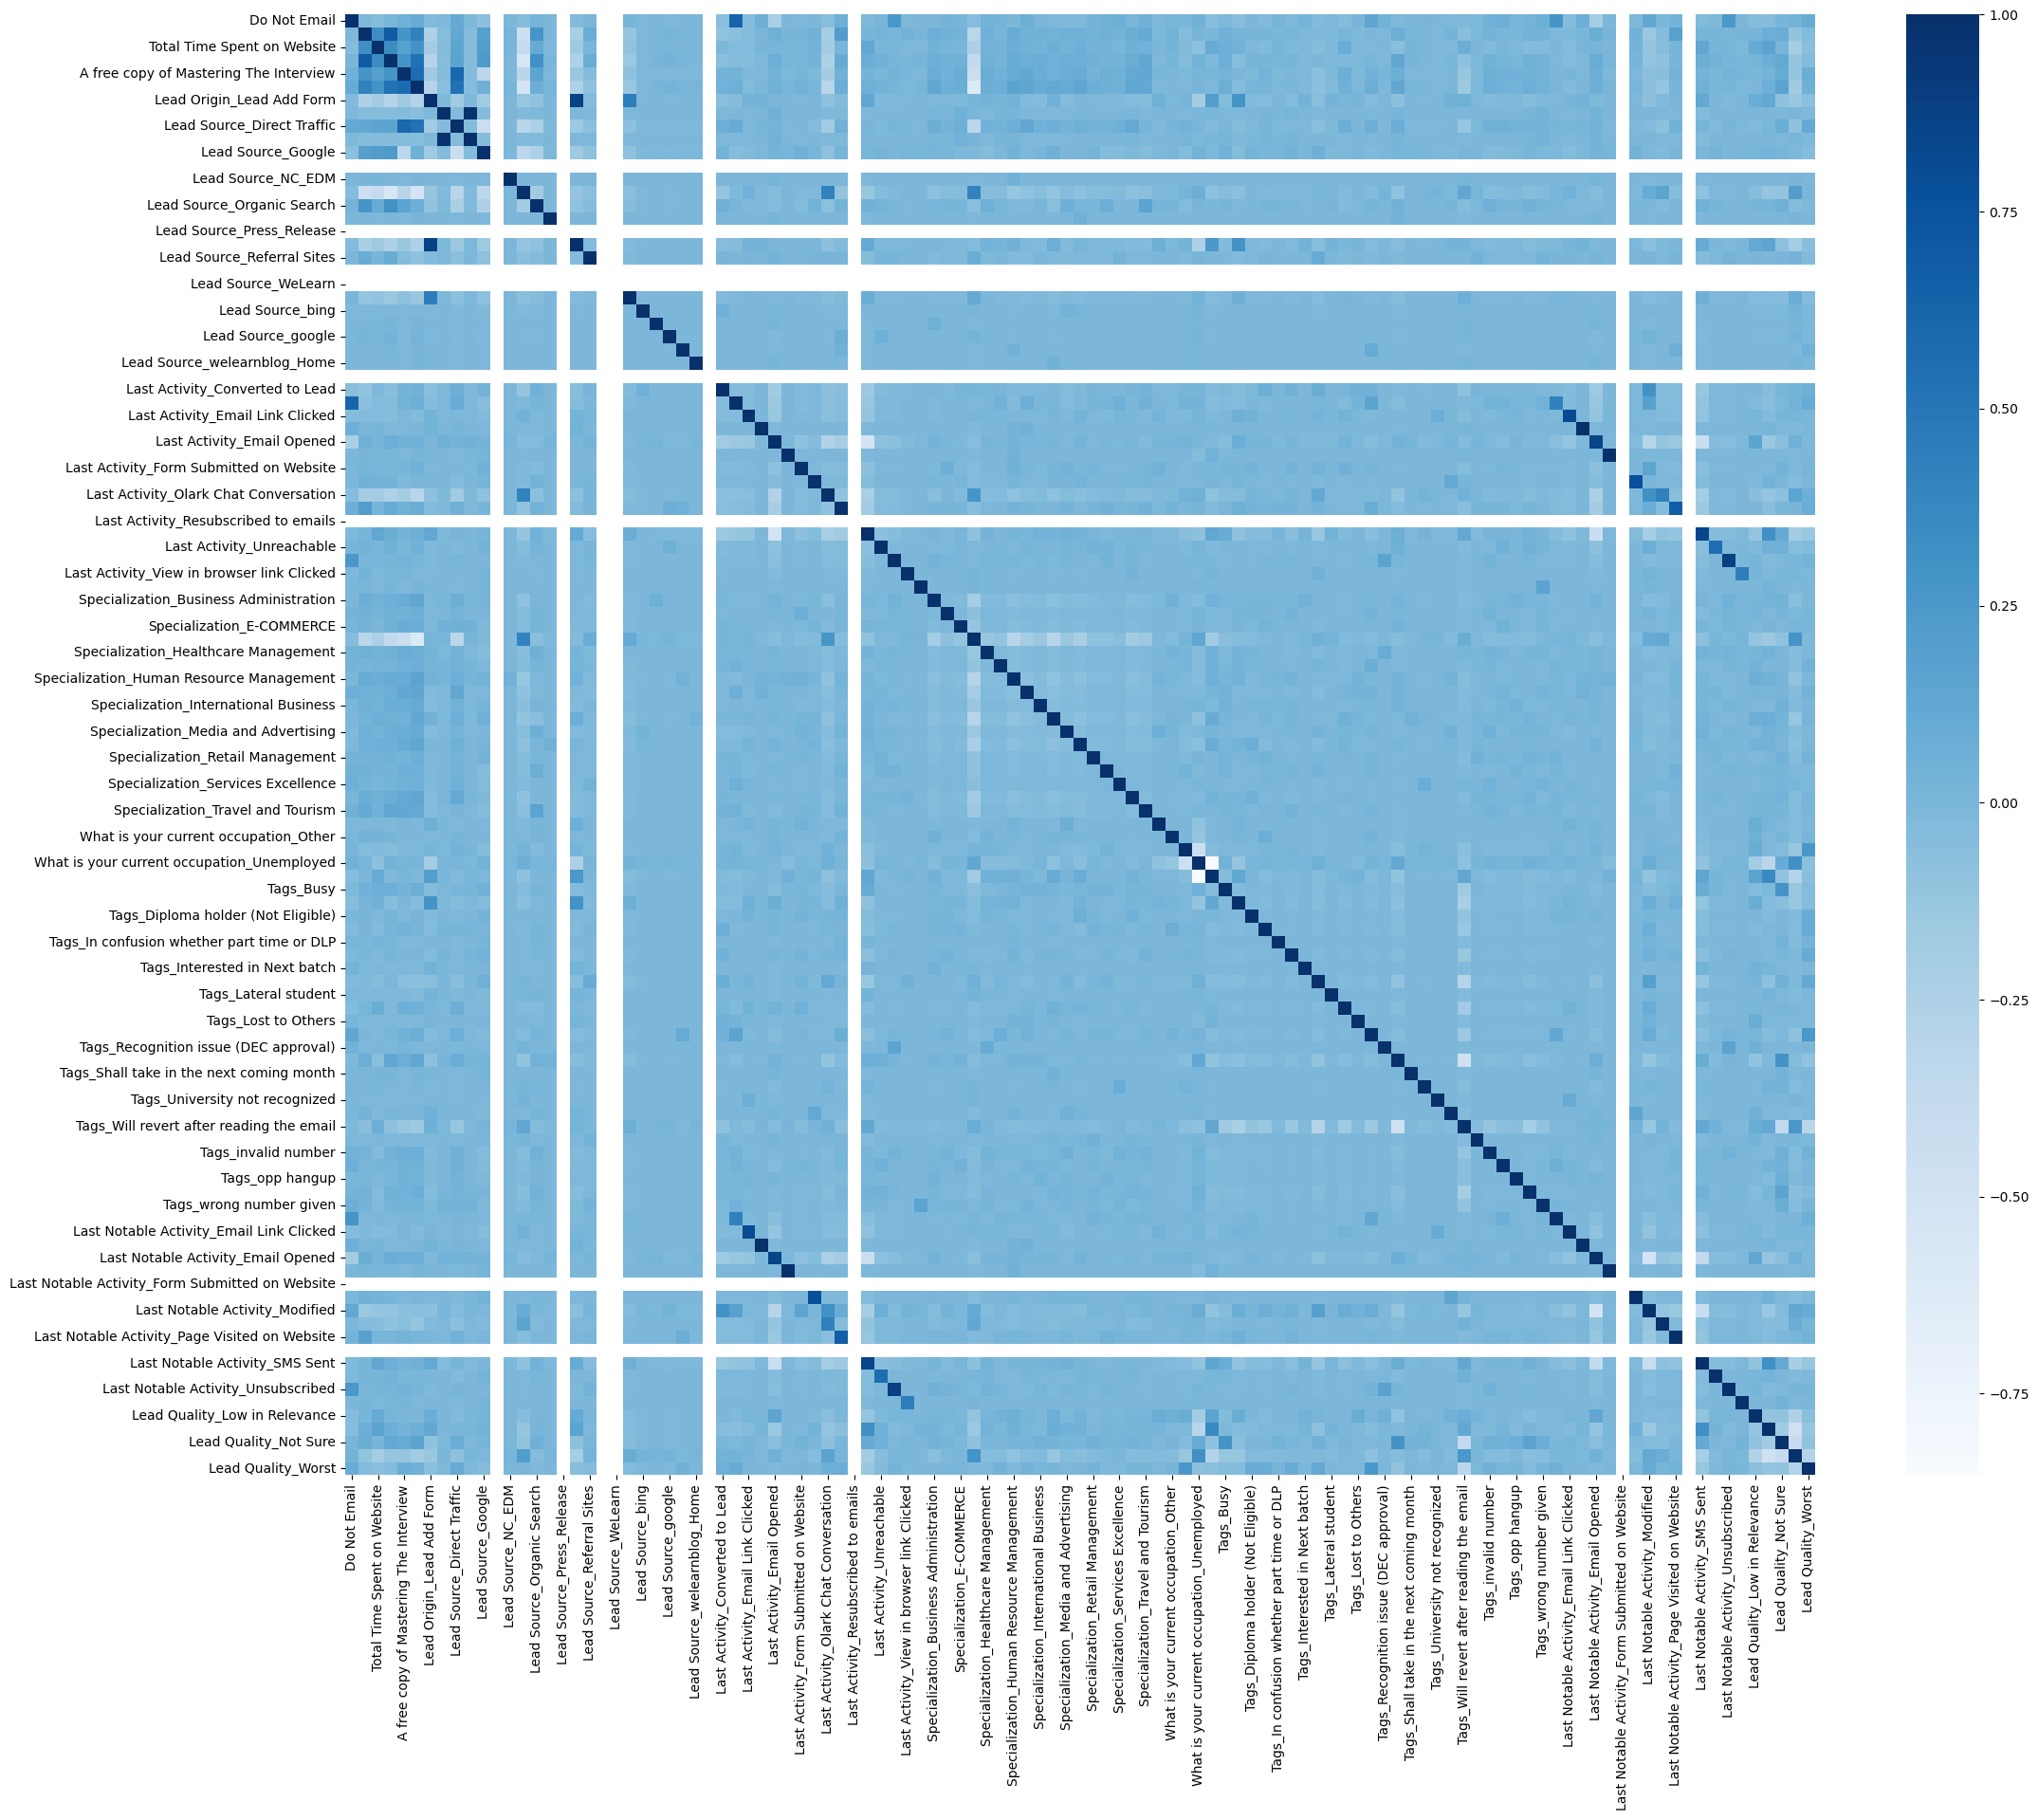

In [618]:
# Plotting heatmap to see the relationships between different variables

plt.figure(figsize=[25,20])
sns.heatmap(X_train.corr(),cmap='Blues')
plt.show()

We see that there are quite a few columns which are highly correlated to each other like 'Last activity email link clicked' and 'Last notable activity email link clicked' also 'Last activity email opened' and 'Last notable activity email opened'.

We will be dealing with those columns while building the model

## 9. Scaling

We see that few numerical variables are having values of different ranges. If we build a model on this then the coefficients obtained would be misleading. 

So we will use MinMaxScaler function to scale the variables and bring them in the range of 0 to 1.

In [619]:
# Scaling variables using MinMaxScaler and fit_transform 

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [620]:
# Checking few records of dataset after scaling

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
583,0,0.095238,0.068662,0.20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1687,0,0.142857,0.068222,0.30,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3052,0,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## 10. Model building

In [621]:
# Selecting the top 15 features using RFE(Recursive Feature Elimination)

model = LogisticRegression()

rfe = RFE(estimator = model,n_features_to_select = 15)

In [622]:
# Fitting the rfe on the training dataset

rfe = rfe.fit(X_train,y_train)

In [623]:
# Seeing the ranks of different variables, all the variables having rank 1 and rfe.support_ as True will be selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 8),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 63),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 94),
 ('Lead Source_NC_EDM', False, 37),
 ('Lead Source_Olark Chat', False, 54),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 89),
 ('Lead Source_Press_Release', False, 90),
 ('Lead Source_Reference', False, 83),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 92),
 ('Lead Source_WeLearn', False, 91),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 64),
 ('Lead Source_blog', False, 55),
 ('Lead Source_google', False,

In [624]:
# Assigning the RFE selected columns to X_cols variable

X_cols=X_train.columns[rfe.support_]

### 10.1 Model 1

In [625]:
import statsmodels.api as sm

In [626]:
# We need to add a constant to the variables while using statsmodel. Building model_1

X_train = sm.add_constant(X_train[X_cols])

model_1 = sm.GLM(y_train,X_train,family = sm.families.Binomial()).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6292
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1317.8
Date:                Sun, 18 Aug 2024   Deviance:                       2635.7
Time:                        23:34:06   Pearson chi2:                 7.25e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5964
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1160      0.167    -12.700      0.000      -2.443      -1.789
Total Time Spent on Website                  3.1717      0.212     14.945      0.000       2.756       3.588
Lead Origin_Lead Add Form                    1.6698      0.457      3.652      0.000       0.774       2.566
Lead Source_Welingak Website                 3.1876      0.863      3.693      0.000       1.496       4.879
Last Activity_SMS Sent                       1.8922      0.110     17.148      0.000       1.676       2.108
Tags_Closed by Horizzon                      9.9849      1.073      9.303      0.000       7.881      12.088
Tags_Lost to EINS                            9.4524      0.660     14.332      0.000       8.160      10.745
Tags_Ringing                                -2.8135      0.278    -10.106      0.000      -3.359      -2.268
Tags_Will revert after reading the email     4.3712      0.212     20.640      0.000       3.956       4.786
Tags_invalid number                         -2.6998      1.071     -2.520      0.012      -4.799      -0.600
Tags_number not provided                   -23.8698   2.32e+04     -0.001      0.999   -4.56e+04    4.55e+04
Tags_switched off                           -3.0268      0.551     -5.493      0.000      -4.107      -1.947
Tags_wrong number given                    -23.3014   1.68e+04     -0.001      0.999    -3.3e+04     3.3e+04
Last Notable Activity_Modified              -1.7204      0.120    -14.307      0.000      -1.956      -1.485
Lead Quality_Unknown                        -4.1936      0.168    -24.947      0.000      -4.523      -3.864
Lead Quality_Worst                          -3.4268      0.681     -5.030      0.000      -4.762      -2.092
============================================================================================================
"""

In [627]:
# Checking VIF values 

vif = pd.DataFrame()
vif['variables'] = X_train.columns
vif['values'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif['values'] = round(vif['values'],2)
vif = vif.sort_values('values',ascending=False)
vif

,variables,values
0,const,12.32
8,Tags_Will revert after reading the email,2.54
7,Tags_Ringing,1.86
2,Lead Origin_Lead Add Form,1.58
15,Lead Quality_Worst,1.46
14,Lead Quality_Unknown,1.38
5,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.19
11,Tags_switched off,1.18


We see that the p-value of Tags_number not provided and Tags_wrong number given is greater than 0.05. Initially lets drop the column Tags_number not provided

In [628]:
# Dropping the 'Tags_number not provided' as it's p-value higher than 0.05 

X_train.drop('Tags_number not provided',axis=1,inplace=True)


In [629]:
# Removing the column from X_cols variable

X_cols = X_cols.drop('Tags_number not provided')

In [630]:
# Viewing few records of the X_train 

X_train.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified,Lead Quality_Unknown,Lead Quality_Worst
583,1.0,0.068662,0,0,0,0,0,0,0,0,0,0,1,1,0
1687,1.0,0.068222,0,0,0,0,0,0,0,0,0,0,1,0,1
3052,1.0,0.000000,0,0,0,0,0,0,1,0,0,0,0,1,0
7512,1.0,0.190581,0,0,1,0,0,0,1,0,0,0,0,1,0
7830,1.0,0.190141,0,0,0,0,0,0,0,0,0,0,0,1,0


### 10.2 Model 2

In [631]:
# Building model_2

X_train = sm.add_constant(X_train[X_cols])

model_2 = sm.GLM(y_train,X_train,family = sm.families.Binomial()).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6292
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1325.1
Date:                Sun, 18 Aug 2024   Deviance:                       2650.3
Time:                        23:34:06   Pearson chi2:                 7.06e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5955
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2088      0.165    -13.350      0.000      -2.533      -1.885
Total Time Spent on Website                  3.1728      0.212     15.000      0.000       2.758       3.587
Lead Origin_Lead Add Form                    1.6980      0.459      3.701      0.000       0.799       2.597
Lead Source_Welingak Website                 3.1577      0.864      3.656      0.000       1.465       4.850
Last Activity_SMS Sent                       1.8731      0.110     17.063      0.000       1.658       2.088
Tags_Closed by Horizzon                     10.0547      1.073      9.369      0.000       7.951      12.158
Tags_Lost to EINS                            9.5221      0.659     14.441      0.000       8.230      10.814
Tags_Ringing                                -2.7057      0.277     -9.780      0.000      -3.248      -2.163
Tags_Will revert after reading the email     4.4579      0.211     21.123      0.000       4.044       4.871
Tags_invalid number                         -2.5943      1.070     -2.424      0.015      -4.692      -0.496
Tags_switched off                           -2.9185      0.550     -5.306      0.000      -3.997      -1.840
Tags_wrong number given                    -23.1956   1.69e+04     -0.001      0.999   -3.31e+04     3.3e+04
Last Notable Activity_Modified              -1.7061      0.120    -14.222      0.000      -1.941      -1.471
Lead Quality_Unknown                        -4.1842      0.168    -24.948      0.000      -4.513      -3.856
Lead Quality_Worst                          -3.3767      0.683     -4.945      0.000      -4.715      -2.038
============================================================================================================
"""

In [632]:
# Calculating VIF's of different columns

vif = pd.DataFrame()
vif['variables'] = X_train.columns
vif['values'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif['values'] = round(vif['values'],2)
vif = vif.sort_values('values',ascending=False)

vif

,variables,values
0,const,12.09
8,Tags_Will revert after reading the email,2.49
7,Tags_Ringing,1.83
2,Lead Origin_Lead Add Form,1.58
14,Lead Quality_Worst,1.46
13,Lead Quality_Unknown,1.38
5,Tags_Closed by Horizzon,1.37
3,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.19
10,Tags_switched off,1.18


We see that the p-value of Tags_wrong number given is greater than 0.05. Hence dropping the column

In [633]:
# Dropping the 'Tags_wrong number given' as it's p-value higher than 0.05 

X_train.drop('Tags_wrong number given',axis=1,inplace=True)


In [634]:
# Removing the column from X_cols variable

X_cols = X_cols.drop('Tags_wrong number given')

### 10.3 Model 3

In [635]:
# Building model_3

X_train = sm.add_constant(X_train[X_cols])

model_3 = sm.GLM(y_train,X_train,family = sm.families.Binomial()).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6292
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1334.6
Date:                Sun, 18 Aug 2024   Deviance:                       2669.2
Time:                        23:34:07   Pearson chi2:                 6.77e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5943
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3422      0.164    -14.270      0.000      -2.664      -2.021
Total Time Spent on Website                  3.2004      0.211     15.162      0.000       2.787       3.614
Lead Origin_Lead Add Form                    1.7442      0.461      3.784      0.000       0.841       2.648
Lead Source_Welingak Website                 3.1142      0.864      3.603      0.000       1.420       4.808
Last Activity_SMS Sent                       1.8415      0.109     16.888      0.000       1.628       2.055
Tags_Closed by Horizzon                     10.1493      1.073      9.456      0.000       8.046      12.253
Tags_Lost to EINS                            9.6154      0.660     14.578      0.000       8.323      10.908
Tags_Ringing                                -2.5564      0.274     -9.321      0.000      -3.094      -2.019
Tags_Will revert after reading the email     4.5759      0.210     21.752      0.000       4.164       4.988
Tags_invalid number                         -2.4462      1.069     -2.287      0.022      -4.542      -0.350
Tags_switched off                           -2.7671      0.549     -5.042      0.000      -3.843      -1.691
Last Notable Activity_Modified              -1.6861      0.120    -14.095      0.000      -1.921      -1.452
Lead Quality_Unknown                        -4.1683      0.167    -24.923      0.000      -4.496      -3.841
Lead Quality_Worst                          -3.3024      0.685     -4.820      0.000      -4.645      -1.959
============================================================================================================
"""

In [636]:
# Calculating VIF's of different columns

vif = pd.DataFrame()
vif['variables'] = X_train.columns
vif['values'] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif['values'] = round(vif['values'],2)
vif = vif.sort_values('values',ascending=False)

vif

,variables,values
0,const,11.71
8,Tags_Will revert after reading the email,2.42
7,Tags_Ringing,1.80
2,Lead Origin_Lead Add Form,1.58
13,Lead Quality_Worst,1.45
12,Lead Quality_Unknown,1.38
5,Tags_Closed by Horizzon,1.36
3,Lead Source_Welingak Website,1.31
1,Total Time Spent on Website,1.19
4,Last Activity_SMS Sent,1.17


## 11. Model Evaluation

In [637]:
# Predictions using model_3

y_train_pred = model_3.predict(X_train)

y_train_pred.head()

583     0.000343
1687    0.000814
3052    0.126235
7512    0.626389
7830    0.002726
dtype: float64

In [638]:
# Converting it to a 1D array

y_train_pred = y_train_pred.values.reshape(-1)

### 11.1 Comparing true values to predicted values

In [639]:
# Creating a dataframe having the true values and predicted probability values

df_pred_train = pd.DataFrame({'Converted':y_train.values,'Predict_prob':y_train_pred,'Lead Score':np.round(y_train_pred*100)})

df_pred_train.head()

,Converted,Predict_prob,Lead Score
0,0,0.000343,0.0
1,0,0.000814,0.0
2,1,0.126235,13.0
3,0,0.626389,63.0
4,0,0.002726,0.0


In [640]:
# Taking the cut-off randomly as 0.5 and putting values above cut-off as 1 else 0

df_pred_train['Prediction'] = df_pred_train.Predict_prob.apply(lambda x: 1 if x>0.5 else 0)

In [641]:
df_pred_train.head()

,Converted,Predict_prob,Lead Score,Prediction
0,0,0.000343,0.0,0
1,0,0.000814,0.0,0
2,1,0.126235,13.0,0
3,0,0.626389,63.0,1
4,0,0.002726,0.0,0


In [642]:
# Creating a confusion matrix

conf_matrix = metrics.confusion_matrix(df_pred_train.Converted,df_pred_train.Prediction)

In [643]:
# Calculating the accuracy score of the training model

metrics.accuracy_score(df_pred_train.Converted,df_pred_train.Prediction)

0.9143356643356644

In [644]:
# Viewing the confusion matrix

conf_matrix

array([[3739,  174],
       [ 365, 2014]], dtype=int64)

In [645]:
# Assigning different elements of confusion matrix to variables where TN(True Negative),TP(True Positive),FP(False Positive),FN(False Negative)

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [646]:
# Calculating sensitivity
TP/(TP+FN)

0.8465741908364859

In [647]:
# Calculating specificity
TN/(TN+FP)

0.9555328392537695

### 11.2 Plotting ROC curve 

In [648]:
# Creating roc_ function to plot ROC curve

def roc_( actual, probs ):
    fpr, tpr, threshold = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

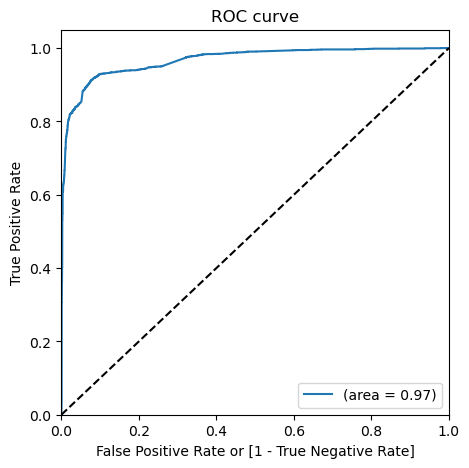

In [649]:
# Plotting the ROC curve

roc_(df_pred_train.Converted,df_pred_train.Predict_prob)

ROC curve can serve as a parameter to check how good our model is. 

If the curve is clinging more to the top and left borders of the graph it indicates the model is good, whereas if the model is clinging more to the 45 degree center line it means that the model needs to be improved.

Our model is more towards top and left borders of the graph and has an area of 0.95 indicating the model is good.

### 11.3 Finding optimal cut-off point

We calculated the different metrics above by randomly selecting cut-off as 0.5. But we should calculate the right cut-off in a scientific way to build a good model

In [650]:
# Dropping the prediction column as we had calculated that with cut-off as 0.5 which was selected randomly. 

df_pred_train.drop('Prediction',axis=1,inplace=True)

In [651]:
# We will take a list of cut-offs (0.0 to 1) and see the predictions of model for each cut-offs
 
num = [float(i)/10 for i in range(10)]

for i in num:
    
    df_pred_train[i] = df_pred_train.Predict_prob.apply(lambda x: 1 if x>i else 0)


In [652]:
# Viewing the df_pred_train dataset with predictions for different cut-offs

df_pred_train.head()

,Converted,Predict_prob,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000343,0.0,1,0,0,0,0,0,0,0,0,0
1,0,0.000814,0.0,1,0,0,0,0,0,0,0,0,0
2,1,0.126235,13.0,1,1,0,0,0,0,0,0,0,0
3,0,0.626389,63.0,1,1,1,1,1,1,1,0,0,0
4,0,0.002726,0.0,1,0,0,0,0,0,0,0,0,0


In [653]:
# Calculating accuracy,sensitivity,specificity for various cut-offs and creating a new dataframe cut with these details

acc_list = []
sens_list = []
spec_list = []
for i in num:
    conf_matrix = metrics.confusion_matrix(df_pred_train.Converted,df_pred_train[i])
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    
    acc_list.append(accuracy)
    sens_list.append(sensitivity)
    spec_list.append(specificity)

cut = pd.DataFrame({'cut_offs':num,'accuracy':acc_list,'sensitivity':sens_list,'specificity':spec_list})


In [654]:
print(cut)

   cut_offs  accuracy  sensitivity  specificity
0       0.0  0.378099     1.000000     0.000000
1       0.1  0.781945     0.977722     0.662918
2       0.2  0.899555     0.931904     0.879888
3       0.3  0.917355     0.917612     0.917199
4       0.4  0.919739     0.899538     0.932021
5       0.5  0.914336     0.846574     0.955533
6       0.6  0.917355     0.823876     0.974189
7       0.7  0.912270     0.795712     0.983133
8       0.8  0.901144     0.759563     0.987222
9       0.9  0.879530     0.696511     0.990800


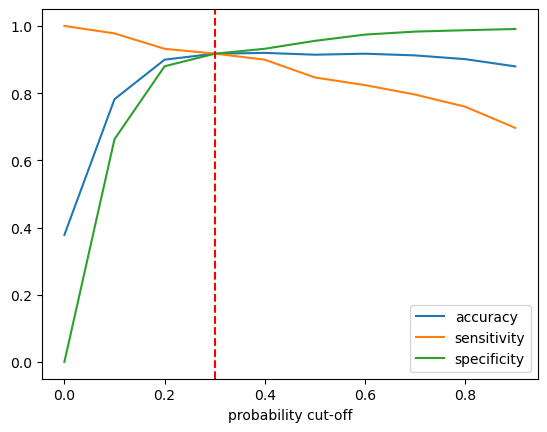

In [655]:
# Plotting accuracy,sensitivity and specificity with each cut-off

plt.plot(cut['cut_offs'],cut[['accuracy','sensitivity','specificity']],label=['accuracy','sensitivity','specificity'])
plt.xlabel('probability cut-off')
plt.axvline(x=0.3, color='r', linestyle='--')
plt.legend()
plt.show()

We see that the curves of accuracy,sensitivity and specificity are having similar value(intersecting) at a cut-off close to 0.3.

So, we can conclude that this must be the optimal cut-off

In [656]:
# Assigning 1 if Predict_prob > 0.3 and 0 if less than 0.3

df_pred_train['final_predict'] = df_pred_train.Predict_prob.apply(lambda x:1 if x>0.3 else 0)

In [657]:
# Checking few records of dataset after adding predictions to it

df_pred_train.head()

,Converted,Predict_prob,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
0,0,0.000343,0.0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000814,0.0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.126235,13.0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.626389,63.0,1,1,1,1,1,1,1,0,0,0,1
4,0,0.002726,0.0,1,0,0,0,0,0,0,0,0,0,0


In [658]:
# Calculating accuracy score

metrics.accuracy_score(df_pred_train.Converted,df_pred_train.final_predict)

0.9173553719008265

In [659]:
# Creating confusion matrix

conf_matrix = metrics.confusion_matrix(df_pred_train.Converted,df_pred_train.final_predict)

In [660]:
# Assigning different elements of confusion matrix to variables where TN(True Negative),TP(True Positive),FP(False Positive),FN(False Negative)

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [661]:
# Calculating sensitivity

TP/(TP+FN)

0.9176124422026062

In [662]:
# Calculating specificity

TN/(TN+FP)

0.9171990799897777

We see that the accuracy is 91.74%, sensitivity is 91.76% and specificity is 91.72% which are pretty good values and indicates that the model is performing well.

### 11.4 Precision and recall

In [663]:
# Calculating precision

precision_score(df_pred_train.Converted,df_pred_train.final_predict)

0.8707618667730355

In [664]:
# Calculating recall

recall_score(df_pred_train.Converted,df_pred_train.final_predict)

0.9176124422026062

### 11.5 Precision-recall tradeoff

In [665]:
# Calculating precision,recall and threshold values using precision_recall_curve function

p,r,cut_off = precision_recall_curve(df_pred_train.Converted,df_pred_train.Predict_prob)

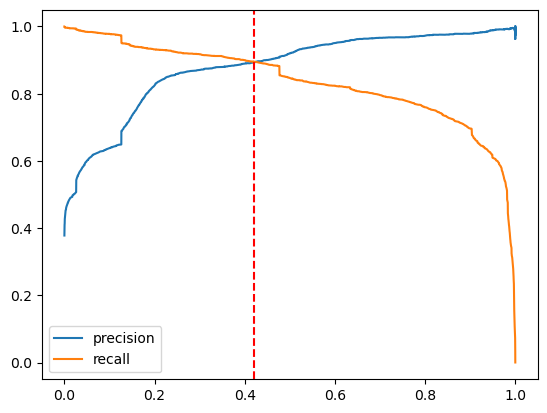

In [666]:
# Plotting precision and recall with different cut-offs

plt.plot(cut_off,p[:-1],label='precision')
plt.plot(cut_off,r[:-1],label='recall')
plt.legend()
plt.axvline(x=0.42, color='r', linestyle='--')
plt.show()

We see that the precision and recall curves are intersecting at a cut-off of 0.42. So we will check the metrics with this value.

In [667]:
# Assigning 1 if Predict_prob > 0.42 else 0

df_pred_train['final_predict_0.42'] = df_pred_train.Predict_prob.apply(lambda x:1 if x>0.42 else 0)

In [668]:
# Checking few records of dataset after adding predictions to it

df_pred_train.head()

,Converted,Predict_prob,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict,final_predict_0.42
0,0,0.000343,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000814,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0.126235,13.0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.626389,63.0,1,1,1,1,1,1,1,0,0,0,1,1
4,0,0.002726,0.0,1,0,0,0,0,0,0,0,0,0,0,0


In [669]:
# Calculating accuracy score

metrics.accuracy_score(df_pred_train.Converted,df_pred_train['final_predict_0.42'])

0.9198982835346472

In [670]:
# Creating confusion matrix

conf_matrix = metrics.confusion_matrix(df_pred_train.Converted,df_pred_train['final_predict_0.42'])

In [671]:
# Assigning different elements of confusion matrix to variables where TN(True Negative),TP(True Positive),FP(False Positive),FN(False Negative)

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]


In [672]:
# Calculating sensitivity

TP/(TP+FN)

0.8953341740226987

In [673]:
# Calculating specificity

TN/(TN+FP)

0.9348326092512139

We see that the sensitivity has fallen to 89.53% from  91.76% which is not desirable. Hence we will continue the analysis with 0.3 as cut-off

## 12. Predictions on Test set

In [674]:
# Viewing the dependent variables of the test dataset

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
6524,0,2.0,172,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8470,1,2.0,131,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5651,0,6.0,297,6.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0

In [675]:
# Viewing the target variable of test dataset

y_test.head()

6524    0
8470    0
5651    1
3176    1
6909    0
Name: Converted, dtype: int64

In [676]:
# Scaling the numerical features of the test dataset 

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [677]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
6524,0,0.095238,0.075704,0.20,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8470,1,0.095238,0.057658,0.20,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5651,0,0.285714,0.130722,0.60,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [678]:
# Creating the dataset with variables from the final model(model_3) prepared

X_test = X_test[X_cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Lead Quality_Unknown,Lead Quality_Worst
6524,0.075704,0,0,0,0,0,0,0,0,0,1,1,0
8470,0.057658,0,0,1,0,0,0,0,1,0,0,0,1
5651,0.130722,0,0,1,0,0,0,1,0,0,0,0,0
3176,0.000000,1,0,0,1,0,0,0,0,0,1,0,0
6909,0.135123,0,0,0,0,0,0,1,0,0,0,1,0


In [679]:
# Predictions on the test dataset using model_2

y_test_pred = model_3.predict(sm.add_constant(X_test))

In [680]:
# Viewing first 5 records of predicted probabilities of test set

y_test_pred.head()

6524    0.000351
8470    0.002318
5651    0.988942
3176    0.999616
6909    0.182096
dtype: float64

In [681]:
# Creating a dataframe df_test having the true values , predicted probabilities and lead score

df_test = pd.DataFrame({'Converted':y_test,'Predicted_prob':y_test_pred,'Lead Score':np.round(y_test_pred*100)})

df_test.head()

,Converted,Predicted_prob,Lead Score
6524,0,0.000351,0.0
8470,0,0.002318,0.0
5651,1,0.988942,99.0
3176,1,0.999616,100.0
6909,0,0.182096,18.0


In [682]:
# Creating a new column final_predict having the prediction values 

df_test['final_predict'] = df_test.Predicted_prob.apply(lambda x:1 if x>0.3 else 0)

In [683]:
df_test.head()

,Converted,Predicted_prob,Lead Score,final_predict
6524,0,0.000351,0.0,0
8470,0,0.002318,0.0,0
5651,1,0.988942,99.0,1
3176,1,0.999616,100.0,1
6909,0,0.182096,18.0,0


In [684]:
# Calculating accuracy score for test set

metrics.accuracy_score(df_test.Converted,df_test.final_predict)

0.921394141638858

In [685]:
# Calculating confusion matrix for test set

conf_matrix2 = metrics.confusion_matrix(df_test.Converted,df_test.final_predict)

In [686]:
# Assigning different elements of confusion matrix to variables where TN(True Negative),TP(True Positive),FP(False Positive),FN(False Negative)

TN = conf_matrix2[0,0]
TP = conf_matrix2[1,1]
FP = conf_matrix2[0,1]
FN = conf_matrix2[1,0]

In [687]:
# Calculating sensitivity for test set

TP/(TP+FN)

0.912109375

In [688]:
# Calculating specificity for test set

TN/(TN+FP)

0.9270771069934249

In [689]:
# Calculating precision for test set

precision_score(df_test.Converted,df_test.final_predict)

0.884469696969697

In [690]:
# Calculating recall for test set

recall_score(df_test.Converted,df_test.final_predict)

0.912109375

We see that the metrics for test and train sets are pretty close to each other indicating the model is performing well. So we will finalize the features of the model and build a equation.

The final equation goes by

3.2 * Total Time Spent on Website + 1.74 * Lead Origin_Lead Add Form + 3.11 * Lead Source_Welingak Website + 1.84 * Last Activity_SMS Sent + 10.15 * Tags_Closed by Horizzon + 9.61 * Tags_Lost to EINS - 2.56 * Tags_Ringing + 4.58 * Tags_Will revert after reading the email - 2.45 * Tags_invalid number - 2.77 * Tags_switched off - 1.69 * Last Notable Activity_Modified - 4.17 * 
Lead Quality_Unknown - 3.3 * Lead Quality_Worst - 2.34